# Feature detection

## Harris Corner detection

As always we start with the imports

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

To start, we will use the same checkerboard image as earlier.

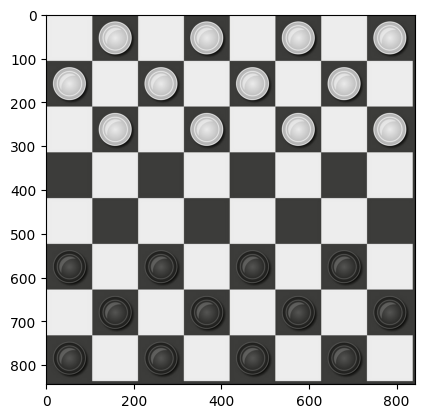

In [2]:
checkers_img = cv2.imread('checkers.png')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(checkers_img)
checkers_img = cv2.merge([r,g,b])
plt.imshow(checkers_img)

### Exercise 2a
Fill in the missing code in the next block. We would like to detect the corners of the image using the OpenCV function [`cv2.cornerHarris`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#gac1fc3598018010880e370e2f709b4345). Afterwards we want to draw the location of the detected corners on the image and display it.

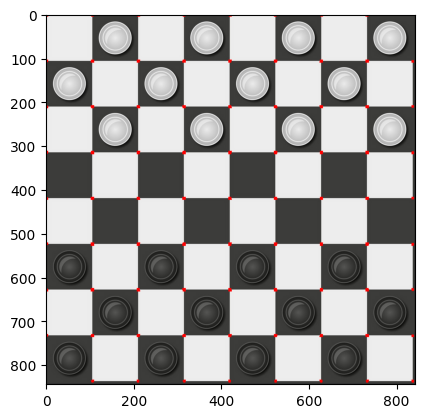

In [3]:
# Change image to grayscale
gray = cv2.cvtColor(checkers_img, cv2.COLOR_RGB2GRAY)

### Insert Harris Corner detector here ###
dst = cv2.cornerHarris(gray, 4, 3, 0.04)

dst = cv2.dilate(dst,None)
 
corner_img = checkers_img.copy()
# Threshold for an optimal value, it may vary depending on the image.
corner_img[dst>0.01*dst.max()]=[255,0,0]

### Draw the detected corners in the original image here ###

# Display image
plt. imshow(corner_img)

## Shi-Tomasi
Next we will try the Shi-Tomasi feature detection method. In OpenCV, that method is implemented as [`cv2.goodFeaturesToTrack`](https://docs.opencv.org/4.7.0/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541). 
Let's start with a different image this time.

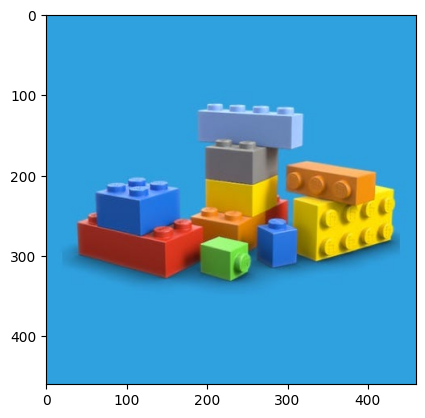

In [4]:
img = cv2.imread('Lego.jpg')
# Changing the order from bgr to rgb so that matplotlib can show it
b,g,r = cv2.split(img)
img = cv2.merge([r,g,b])
plt.imshow(img)

### Exercise 2b
Just like the previous exercise, detect the corners of the image by inserting the missing code, this time using the Shi-Tomasi (good features to track) method. Draw the detected corners on the image. Check the documentation of the function for help.

detected corners: 50


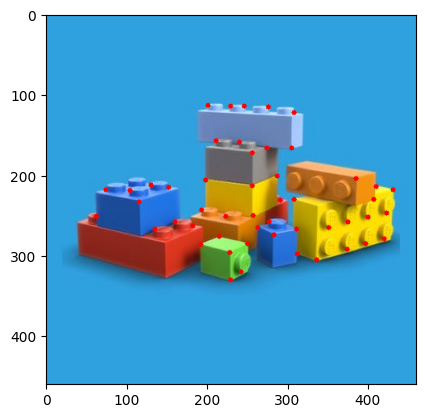

In [5]:
# Change image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

### Insert goodFeaturesToTrack detector here ###

# corners = cv2.goodFeaturesToTrack(gray,25,0.01,10)
corners = cv2.goodFeaturesToTrack(gray,50,0.01,15)
corners = corners.astype(int)

shi_img = img.copy() 

print(f"detected corners: {len(corners)}")

for i in corners:
    x,y = i.ravel()
    cv2.circle(shi_img,(x,y),3,255,-1)
 

### Draw the detected corners in the original image here ###

# Display image
plt. imshow(shi_img)

### Exercise 2c
Do a Harris corner detection on the same Lego image and compare the result with the Shi-Tomasi image.

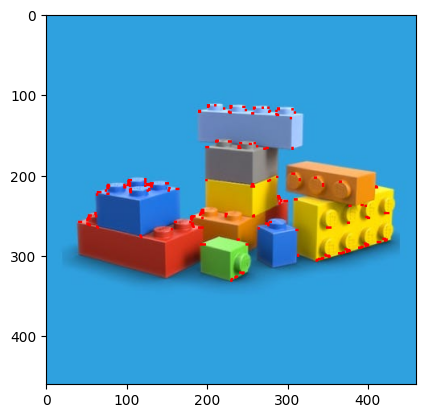

In [6]:
# Change image to grayscale
# gray = cv2.cvtColor(checkers_img, cv2.COLOR_RGB2GRAY)

### Insert Harris Corner detector here ###
dst = cv2.cornerHarris(gray, 2, 5, 0.1)

dst = cv2.dilate(dst,None)
 
# corner_img = checkers_img.copy()
shi_img = img.copy() 
# Threshold for an optimal value, it may vary depending on the image.
shi_img[dst>0.01*dst.max()]=[255,0,0]

### Draw the detected corners in the original image here ###

# Display image
plt. imshow(shi_img)